# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [1]:
DATA_FOLDER = 'Data/' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average* per year of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

Importing libraries

In [2]:
import pandas as pd
import numpy as np
import os

Setting global variables

In [3]:
liberia_directory = DATA_FOLDER+"ebola/liberia_data"
liberia_cols = ['Date','Variable','National']

sierral_directory = DATA_FOLDER+"ebola/sl_data"
sierral_cols = ['date','variable','National']

guinea_directory = DATA_FOLDER+"ebola/guinea_data"
guinea_cols = ['Date','Description','Totals']

months=['January','February','March','April','May','June','July','August','September','October','November','December']

Reading data from files and storing it in a separate dataframe for each country. For each country:

* We iterate over all files in the country's directory.
* Store the date, the description and national total column in a dataframe
* Concatenate all the dataframes into one large one for all files

In [4]:
#liberia
liberia = pd.DataFrame()
liberia_variable_list = []

for filename in os.listdir(liberia_directory):
    if filename.endswith(".csv"):
        file = liberia_directory+'/'+filename
        current_dataframe = pd.read_csv(file,usecols=liberia_cols)
    liberia_variable_list.append(current_dataframe)
liberia = pd.concat(liberia_variable_list)

#sierra leone
sierral = pd.DataFrame()
sierral_variable_list = []

for filename in os.listdir(sierral_directory):
    if filename.endswith(".csv"):
        file = sierral_directory+'/'+filename
        current_dataframe = pd.read_csv(file,usecols=sierral_cols)
    sierral_variable_list.append(current_dataframe)
sierral = pd.concat(sierral_variable_list)

#guinea
guinea = pd.DataFrame()
guinea_variable_list = []

for filename in os.listdir(guinea_directory):
    if filename.endswith(".csv"):
        file = guinea_directory+'/'+filename
        current_dataframe = pd.read_csv(file,usecols=guinea_cols)
    guinea_variable_list.append(current_dataframe)
guinea = pd.concat(guinea_variable_list)


For each country's dataframe we do the following:
* Filter out the rows we do not need (we need confirmed deaths, confirmed cases, probable cases, suspected cases). We decided not to include probable and suspected deaths as this data was not available for all countries
* Add a column for the country (this will be used when we join dataframes later)
* Convert the date of row into the month. We will use this to group by month.
* Replace all NaN with a 0. We are assuming that if data for a particular month is not available, there were 0 deaths or new cases in that month.
* Clean the description so that they are consistent accross data sets using the cleanDescription function
* Finally we convert the data type for the number to an int so that we can take the mean when we aggregate

In [5]:
def cleanDescription(description):
    if description=='Newly reported deaths' or description=='death_confirmed' or description=='New deaths registered':
        return 'Average Daily Deaths'
    if description=='New case/s (confirmed)' or description=='new_confirmed' or description=='New cases of confirmed':
        return 'Average confirmed new cases'
    if description=='New Case/s (Probable)' or description=='new_probable' or description=='New cases of probables':
        return 'Average probable new cases'
    if description=='New Case/s (Suspected)' or description=='new_suspected' or description=='New cases of suspects':
        return 'Average suspected new cases'
    

#liberia
liberia['Description']=liberia['Variable'].apply(lambda x : cleanDescription(x))
liberia=liberia[[description=='Average Daily Deaths' or description=='Average confirmed new cases' or description=='Average probable new cases' or description=='Average suspected new cases' for description in liberia['Description'] ]]
liberia['Country'] = 'Liberia'
liberia['Month']=liberia['Date'].apply(lambda i : months[int(i.replace('-','/').replace('.','/').split('/')[0])-1])
liberia = liberia.fillna(0)
liberia['National']=liberia['National'].apply(lambda x : int(x))

liberia=liberia.groupby(['Country','Month','Description'])['National'].mean()
# liberia


#sierra leone
sierral['Description']=sierral['variable'].apply(lambda x : cleanDescription(x))
sierral=sierral[[description=='Average Daily Deaths' or description=='Average confirmed new cases' or description=='Average probable new cases' or description=='Average suspected new cases' for description in sierral['Description'] ]]
sierral['Country'] = 'Sierra Leone'
sierral['Month']=sierral['date'].apply(lambda i : months[int(i.replace('-','/').replace('.','/').split('/')[1])-1])
sierral = sierral.fillna(0)
sierral['National']=sierral['National'].apply(lambda x : int(x))

sierral=sierral.groupby(['Country','Month','Description'])['National'].mean()
# sierral

#guinea
guinea['Description']=guinea['Description'].apply(lambda x : cleanDescription(x))
guinea=guinea[[description=='Average Daily Deaths' or description=='Average confirmed new cases' or description=='Average probable new cases' or description=='Average suspected new cases' for description in guinea['Description'] ]]
guinea['Country'] = 'Guinea'
guinea['Month']=guinea['Date'].apply(lambda i : months[int(i.replace('-','/').replace('.','/').split('/')[1])-1])
guinea = guinea.fillna(0)
guinea['National']=guinea['Totals'].apply(lambda x : int(x))

guinea=guinea.groupby(['Country','Month','Description'])['National'].mean()
# guinea

final_output = pd.DataFrame()
v_list = [liberia, sierral, guinea]
final_output = pd.concat(v_list)

final_output


Country       Month      Description                
Liberia       August     Average Daily Deaths             23.222222
                         Average confirmed new cases       5.444444
                         Average probable new cases       19.777778
                         Average suspected new cases      12.000000
              December   Average Daily Deaths              0.000000
                         Average confirmed new cases    1928.333333
                         Average probable new cases     1208.000000
                         Average suspected new cases    2042.222222
              July       Average Daily Deaths              4.272727
                         Average confirmed new cases       1.818182
                         Average probable new cases        3.727273
                         Average suspected new cases       3.000000
              June       Average Daily Deaths              2.000000
                         Average confirmed new cases       2.14

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

## Answer to task 2

In this task the Microbiome datasets will be treated. First it will be demonstrated how all nine spreadsheets containing RNA sequences can be loaded into the same Panda dataframe and later the Metadata will be used to create a more useful dataframe where the actual nature of the data is taken into account. 

Before being able to do anything it is nessary to take a look at the raw data. After a glance at the excel files it is evident that they all have two columns; one consisting of a RNA sequence and one with small integers. Since they all have the same structure they are easily combined into a simple dataframe. It should be noted that we are still not taking any metadata into account.

The way this simple Panda dataframe will be constructed is by creating a vector of all the relevant filenames and afterwardds loop over the filenames and within the loop read the files into a temporary panda (rna2) and concatenate the temporary with the total dataframe (rna) one by one and still within the loop. Finally the index and the coulmn are given names.

In [7]:
import pandas as pd
import numpy as np
DATA_PATH = DATA_FOLDER + 'microbiome/'
filenames = ["MID1.xls","MID2.xls","MID3.xls","MID4.xls","MID5.xls","MID6.xls","MID7.xls","MID8.xls","MID9.xls"]
rna = pd.DataFrame()
rna2 = pd.DataFrame()
for filename in filenames:
    rna2 = pd.read_excel(DATA_PATH + filename, 'Sheet 1', index_col=0, header=None) 
    rna = pd.concat([rna,rna2])
rna.columns = ['Count']
rna.index.name = 'RNA-sequence'

In [8]:
rna.head()

,Count
RNA-sequence,
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus",2
"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus",3
"Archaea ""Crenarchaeota"" Thermoprotei Thermoproteales Thermofilaceae Thermofilum",3
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanocellales Methanocellaceae Methanocella",7


The first five rows of the dataframe called rna is showed above. 

When working with data it is however important to understand it before a useful and relavant dataframe can be constructed. Therefore it is necessary to look at the metadata sheet and see how this aplies to the other sheets. We observe that:
 - NEC1 (perhaps one person or a group of people with NEC disease) has RNA sequences taken from the tissue and the stool. Data in MID2 and MID6
 - NEC2 is another group with the disease and RNA sequences taken from the tissue and the stool. Data in MID4 and MID8.
 - CONTROL1 and CONTROL2 are control groups for the two other groups and has the same tests (tissue and stool). Data in MID3, MID5, MID7, MID9.
 - Extraction control contains RNA sequences and results for unknown test (NA) (we dont know if this is from tissue or stool or a mix)

It will now be demonstrated how the data is imported into a dataframe with the columns Group, RNA-sequence, Tissue, Stool and NA. The index will consist of both the group and the RNA-sequence.

Description of procedure:

 - Files with data concerning Tissue are first each read into a panda and the column with numbers are given the name Tissue. These are all stored in a dictionary, so that they are easy to acess later.
 - Likewise files with data concerning Stool are read and the column is given the name Stool.
 - The file with NA data is read and the column is given this name
 - The Pandas with data from the same group (ex. NEC1) is taken from the dictionary and concatenated column wise.
 - The five resulting dataframes are then concatenated while giving them the relevant keys according to their group.
 - The index is renamed, NaN's are replaced by Unknown and the order of the columns is rearranged

In [9]:
filenames = ["MID1.xls","MID2.xls","MID3.xls","MID4.xls","MID5.xls","MID6.xls","MID7.xls","MID8.xls","MID9.xls"]
d = {} #dictionary created

for filename in filenames[1:5]: #reading files with tissue data
    d[filename] = pd.read_excel(DATA_PATH + filename, 'Sheet 1', index_col=0, header=None, names=['Tissue'])
    
for filename in filenames[5:9]: #reading files with stool data
    d[filename] = pd.read_excel(DATA_PATH + filename, 'Sheet 1', index_col=0, header=None, names=['Stool'])
    
d['MID1.xls'] = pd.read_excel(DATA_PATH + filename, 'Sheet 1', index_col=0, header=None, names=['NA']) #reading file with NA data

In [10]:
NEC1 = pd.concat([d['MID2.xls'],d['MID6.xls']],axis=1) #concatenating dataframes concerning group NEC1
Control1 = pd.concat([d['MID3.xls'],d['MID7.xls']],axis=1) #concatenating dataframes concerning group Control1
NEC2 = pd.concat([d['MID4.xls'],d['MID8.xls']],axis=1) #concatenating dataframes concerning group NEC2
Control2 = pd.concat([d['MID5.xls'],d['MID9.xls']],axis=1) #concatenating dataframes concerning group Control2
rna = pd.concat([NEC1,Control1,NEC2,Control2,d['MID1.xls']],keys=['NEC1','Control1','NEC2','Control2','Extraction Control']) #Concatenating all

In [11]:
rna.index.names = ['Group','RNA-sequence'] #Index names are changed
rna.fillna('Unknown',inplace=True) #NAN's replaced
rna = rna[['Tissue','Stool','NA']]  #Order of columns changed
rna

Tissue  \
Group              RNA-sequence                                                  
NEC1               Archaea "Crenarchaeota" Thermoprotei Acidilobal...        2   
                   Archaea "Crenarchaeota" Thermoprotei Acidilobal...       14   
                   Archaea "Crenarchaeota" Thermoprotei Desulfuroc...       23   
                   Archaea "Crenarchaeota" Thermoprotei Desulfuroc...        1   
                   Archaea "Crenarchaeota" Thermoprotei Desulfuroc...        2   
                   Archaea "Crenarchaeota" Thermoprotei Desulfuroc...        1   
                   Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  Unknown   
                   Archaea "Crenarchaeota" Thermoprotei Desulfuroc...        2   
                   Archaea "Crenarchaeota" Thermoprotei Sulfolobal...       10   
                   Archaea "Crenarchaeota" Thermoprotei Sulfolobal...       11   
                   Archaea "Crenarchaeota" Thermoprotei Thermoprot...        9   
                   Archaea "Crenarchaeota" Thermoprotei Thermoprot...        5   
                   Archaea "Crenarchaeota" Thermoprotei Thermoprot...        3   
                   Archaea "Euryarchaeota" "Methanomicrobia" Metha...        9   
                   Archaea "Euryarchaeota" "Methanomicrobia" Metha...        1   
                   Archaea "Euryarchaeota" "Methanomicrobia" Metha...       12   
                   Archaea "Euryarchaeota" "Methanomicrobia" Metha...  Unknown   
                   Archaea "Euryarchaeota" "Methanomicrobia" Metha...        2   
                   Archaea "Euryarchaeota" Archaeoglobi Archaeoglo...        4   
                   Archaea "Euryarchaeota" Halobacteria Halobacter...        3   
                   Archaea "Euryarchaeota" Halobacteria Halobacter...        1   
                   Archaea "Euryarchaeota" Halobacteria Halobacter...        4   
                   Archaea "Euryarchaeota" Halobacteria Halobacter...        3   
                   Archaea "Euryarchaeota" Halobacteria Halobacter...  Unknown   
                   Archaea "Euryarchaeota" Halobacteria Halobacter...        5   
                   Archaea "Euryarchaeota" Halobacteria Halobacter...  Unknown   
                   Archaea "Euryarchaeota" Halobacteria Halobacter...        2   
                   Archaea "Euryarchaeota" Halobacteria Halobacter...       26   
                   Archaea "Euryarchaeota" Methanobacteria Methano...        1   
                   Archaea "Euryarchaeota" Methanopyri Methanopyra...       47   
...                                                                        ...   
Extraction Control Bacteria "Proteobacteria" Gammaproteobacteria O...  Unknown   
                   Bacteria "Proteobacteria" Gammaproteobacteria O...  Unknown   
                   Bacteria "Proteobacteria" Gammaproteobacteria O...  Unknown   
                   Bacteria "Proteobacteria" Gammaproteobacteria P...  Unknown   
                   Bacteria "Proteobacteria" Gammaproteobacteria P...  Unknown   
                   Bacteria "Proteobacteria" Gammaproteobacteria P...  Unknown   
                   Bacteria "Proteobacteria" Gammaproteobacteria P...  Unknown   
                   Bacteria "Proteobacteria" Gammaproteobacteria P...  Unknown   
                   Bacteria "Proteobacteria" Gammaproteobacteria P...  Unknown   
                   Bacteria "Proteobacteria" Gammaproteobacteria P...  Unknown   
                   Bacteria "Proteobacteria" Gammaproteobacteria T...  Unknown   
                   Bacteria "Proteobacteria" Gammaproteobacteria T...  Unknown   
                   Bacteria "Proteobacteria" Gammaproteobacteria T...  Unknown   
                   Bacteria "Proteobacteria" Gammaproteobacteria T...  Unknown   
                   Bacteria "Proteobacteria" Gammaproteobacteria X...  Unknown   
                   Bacteria "Proteobacteria" Gammaproteobacteria X...  Unknown   
                   Bacteria "Proteobacteria" Gammaprot


We now have a complete dataframe where all information is collected and easy to read. Lets check that the index is in fact unique.

In [12]:
rna.index.is_unique

True


This is of course to be expected but it also confirms that the dataframes have been concatenated correctly.

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [13]:
from IPython.core.display import HTML
file_path1= DATA_FOLDER+'/titanic.html'
HTML(filename=file_path1)



Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

We start by loading the data into a pandas dataframe and call it `titanic`:

In [14]:
import pandas as pd
import numpy as np
file_path2= DATA_FOLDER+'/titanic.xls'
titanic = pd.read_excel(file_path2)
titanic.head(1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"


**Question 1**

Titanic contains 1309 observations of 14 variables, which we can see via the function `titanic.shape()`. It contains numereous missing values represented by `NaN` as we can check with in the code below.

In [15]:
#check if the dataFrame contains any NaN values 
np.any(titanic.isnull())

True

We can view the default types of each variable in the cell bellow

In [16]:
Type=titanic.dtypes
Type.name='Type'
Type

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
Name: Type, dtype: object

However, several variables- such as class, the sex and the embarkation site of the passengers- which are represented here by integers or doubles, could be more efficiently described with categorical values.
For example, the variable pclass takes values in $[1,2,3]$ according to the travelling class of the passenger and thus does not represent an actual numerical value.

In the cell bellow, we change the type of the variables mentionned above to `Categorical`.


In [17]:
titanic.pclass=pd.Categorical(titanic.pclass,ordered=True)
titanic.sex=pd.Categorical(titanic.sex)
titanic.embarked=pd.Categorical(titanic.embarked)

We now construct a table to summarize the type of all variables and eventually their range (if they are Integer or Double).

In [18]:
description = titanic.describe()
description.columns
description=description.drop('body',axis=1)
description=description.transpose()
description=description.drop(['count','std','25%','50%','75%'],axis=1)
result = pd.concat([Type, description], axis=1)
result.fillna('-')

,Type,mean,min,max
age,float64,29.8811,0.1667,80
boat,object,-,-,-
body,float64,-,-,-
cabin,object,-,-,-
embarked,object,-,-,-
fare,float64,33.2955,0,512.329
home.dest,object,-,-,-
name,object,-,-,-
parch,int64,0.385027,0,9
pclass,int64,-,-,-


**question 2**

In this section, we will draw histograms of some key variables. For this purpose we first import the necessary libraries (`matplotlib`,`seaborn`) 

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn', Mutes warnings when copying a slice from a DataFrame.

We first create a figure and divide it into 4 subplots where the histograms for each variables are drawn.
We then define a function `create_plot`that takes as an argument the name of the variable we want to plot, the names of the X and Y axis and the subplot we want to plot in. The function calls `countplot` of the seaborn library and sets the xlabel, ylab and the title. It will be used to plot the distribution of the number of passengers according to travelling class, sex and embarkation sites. 

The age histogram however, is treated separately since the variable in question is not discrete. We will first round it to the closest decade and then apply the same steps as previously.


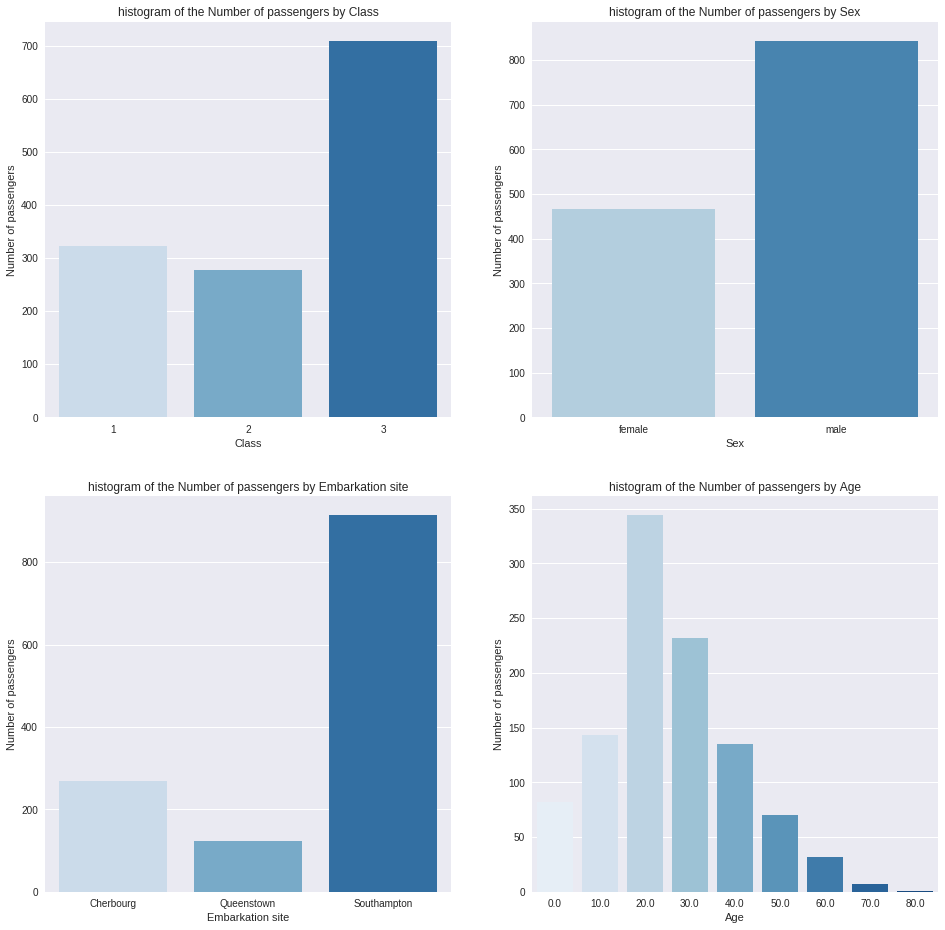

In [20]:
f, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, figsize=(16, 16))
def create_plot (var,xlab,ylab,axis): 
    sns.countplot(x=var,data=titanic, palette="Blues", ax=axis)
    axis.set_ylabel(ylab)
    axis.set_xlabel(xlab)    
    axis.set_title('histogram of the '+ylab+' by '+xlab)

create_plot('pclass','Class','Number of passengers',ax1)
create_plot('sex','Sex','Number of passengers',ax2)

# EMBARKATION SITE : Set the name of the embarkation sites as labels for x-axis (instead of simply the first letters)
create_plot('embarked','Embarkation site','Number of passengers',ax3)
embark_sites = ['Cherbourg','Queenstown','Southampton']
ax3.set_xticklabels(embark_sites)

#In order to plot the bar plot of the age variable , we first need to round it to the closest decade
age_round= [np.floor(x/10)*10 for x in titanic.age]
age_round
sns.countplot(age_round,palette='Blues',ax=ax4)
ax4.set_ylabel('Number of passengers')
ax4.set_xlabel('Age')    
ax4.set_title('histogram of the Number of passengers by Age')



**Question 3**

*Calculate the proportion of passengers by cabin floor. Present your results in a pie chart.*

The cabin identification of each passenger is given by the variable `cabin`. This variable is a `string` created by the concatenation of the floor identifcation (an upper-case letter) and the number of the cabin. Hence, in order to obtain the number of passengers on each floor, we have to extract the letter from the `cabin` variable and count the number of its occurences in the column.

In [21]:
import string as st
#We replace NaN values by '-' 
titanic.cabin=titanic.cabin.fillna('-')
letters = st.ascii_uppercase

#Define a function extract_floor : given a string, it will extract the first uppercase letter it contains.
def extract_floor (cabin):
    ind=pd.Series([-1])
    for i in letters:
        ind[i]=cabin.find(i)
        
    ind=ind.transpose()
    result=ind[ind.values>-1].index[0]
        
    return result
#Create a new column in titanic where we will store the floor identification letter and initialize it with '-'
titanic['floor']='-'
#Extract the floor identification for each passenger in the dataset and store it in the column 'floor'
for i in titanic.index:
    if titanic.cabin[i]!='-':
        titanic.floor[i]=  extract_floor(str(titanic.cabin[i]))

  

In [22]:
# OVerview of the dataFrame with the new column
titanic.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,floor
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",B
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",C
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",C
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",C
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",C


The next step consists in constructing the pie chart.
We will first define the floor variable as categorical and count the number of elements in each category.Thenm we will call the function `pie()`to create the pie chart and set the corresponding parameters.

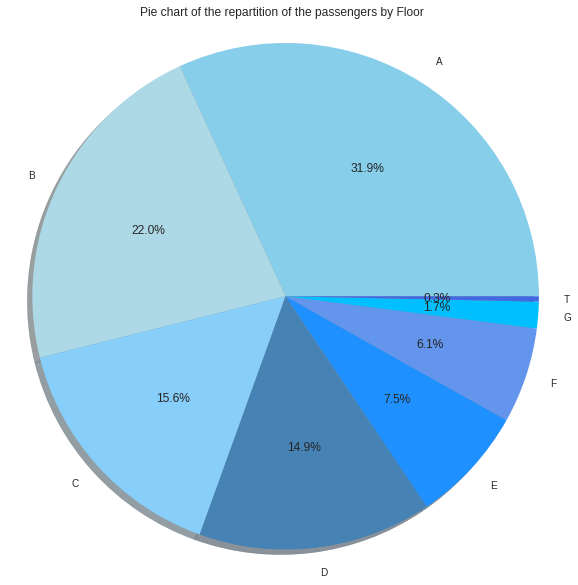

In [23]:
#set the floor variable as Categorical and count the number of observations in each category 
titanic.floor=pd.Categorical(titanic.floor)
data=titanic.floor.value_counts()

#create the pie chart 
labels = data.index.categories[1:]
values = data.values[1:]
colors =['skyblue','lightblue','lightskyblue','steelblue','dodgerblue','cornflowerblue','deepskyblue','royalblue']
f, ax = plt.subplots(1,1, figsize=(8,8),)
plt.pie(values, labels=labels,autopct='%1.1f%%', shadow=True,colors=colors)
plt.axis('equal')
plt.tight_layout()
plt.title('Pie chart of the repartition of the passengers by Floor')
plt.show()



**Question 4**

*For each travel class, calculate the proportion of the passengers that survived. Present your results in pie charts.*

We will use the `.groupby()` function to aggregate our observations by class and then apply `.sum()` to count the number of observations in each class.
We will store the results in a dataFrame called *survival_class* and add a new column containing the proportion of the survivors in each class. 


In [24]:
survival_class=pd.DataFrame(titanic.survived.groupby(titanic.pclass).sum())
survival_class['proportion']=100*survival_class.survived/survival_class.survived.sum()
#view the dataFrame
survival_class

,survived,proportion
pclass,,
1,200,40.0
2,119,23.8
3,181,36.2


WE will now plot the results of the dataframe above into a pie chart.

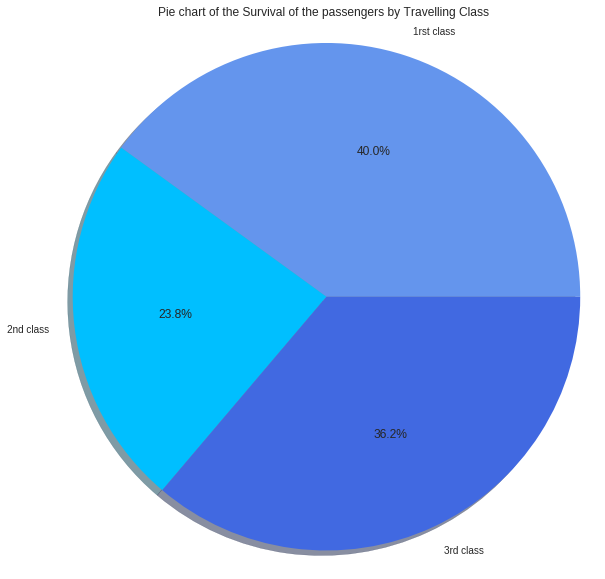

In [25]:
#Set the labels
labels = ['1rst class','2nd class','3rd class']
#access the "survived" column in the "survival_class" dataframe created above.
values = survival_class.survived.values
colors =['cornflowerblue','deepskyblue','royalblue']
#create the pie chart 
f, ax = plt.subplots(1,1, figsize=(8,8),)
plt.pie(values, labels=labels,autopct='%1.1f%%', shadow=True,colors=colors)
plt.axis('equal')
plt.tight_layout()
plt.title('Pie chart of the Survival of the passengers by Travelling Class')
plt.show()

**Question 5 **

*Calculate the proportion of the passengers that survived by travel class and sex. Present your results in a single histogram.*

The aim of this part is to compute the proportion of survivors not only by class but also by sex.For this purpose, we will use the `.groupby()`function with the list `[titanic.pclass, titanic.sex]` as argument. 

In [26]:
survival_class_sex=pd.DataFrame(titanic.survived.groupby([titanic.pclass,titanic.sex]).sum())
survival_class_sex['proportion'] = survival_class_sex.groupby(level=1).apply(lambda x:100 * x / x.sum())
survival_class_sex

survived  proportion
pclass sex                         
1      female       139   41.002950
       male          61   37.888199
2      female        94   27.728614
       male          25   15.527950
3      female       106   31.268437
       male          75   46.583851

The histograms are drawn using the function `factorplot` of the seaborn library. 

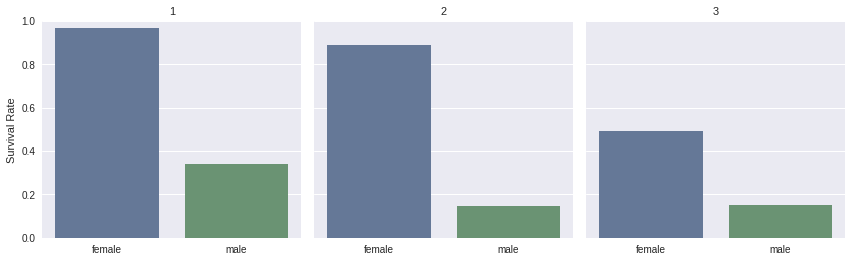

In [27]:

g = sns.factorplot(x='sex', y='survived', col='pclass',data=titanic, saturation=.5,kind='bar', ci=None)
(g.set_axis_labels('', 'Survival Rate')
   .set_titles('{col_name}')
   .set(ylim=(0, 1))
   .despine(left=True)) 

As the figure above shows, the survival rate is higher for women than for men for all classes.
However we notice that the survival rate for both genders is lower in the second and even more in the third classes compared to the first one.

**Question 6:**

*Create 2 equally populated age categories and calculate survival proportions by age category, travel class and sex. Present your results in a DataFrame with unique index.*

In order to create 2 (almost) equally populated age categories, we need to find the median of the age variable and divide the dataset along that point. 

We have to note that this method excludes the rows where the age is missing and thus the union of both catgeories won't cover the whole dataset.

In [28]:
age_median= titanic.age.median()
print('The age median in the dataset is '+str(age_median))

The age median in the dataset is 28.0


In [29]:
#sub-dataset containing the passengers who are older than 28
age_category_1=titanic.loc[titanic.age>age_median]
#sub-dataset containing the passengers who are younger than 28
age_category_2=titanic.loc[titanic.age<=age_median]

For each category, we compute the proportion of survivors relative to the total number of passengers in that category.

In [30]:
# We compute the proportion of survivors in each category 
# here we divide by the total number of persons in the category
survival_1=100*age_category_1.survived.sum()/age_category_1.shape[0] 
survival_2=100*age_category_2.survived.sum()/age_category_2.shape[0]

In [31]:
# We compute the number of Men/Women who survived in each category 
sex_1=age_category_1.survived.groupby([age_category_1.sex]).sum()
sex_2=age_category_2.survived.groupby([age_category_2.sex]).sum()
#we divide by the total number of persons in the category
sex_1=100*sex_1/age_category_1.shape[0] 
sex_2=100*sex_2/age_category_2.shape[0] 

In [32]:
# We compute the number of first/second/third class survivors in each category 
class_1=age_category_1.survived.groupby([age_category_1.pclass]).sum()
class_2=age_category_2.survived.groupby([age_category_2.pclass]).sum()
# we divide by the total number of passengers in the category
class_1=100*class_1/age_category_1.shape[0] 
class_2=100*class_2/age_category_2.shape[0]

In [33]:
# we create a dataFrame containing all the proportions computed above.
frame = pd.DataFrame(np.arange(12).reshape((2, 6)), 
                  index =['age category 1', 'age category 2'], 
                  columns =[['% by Sex','% by Sex','% by travelling Class','% by travelling Class','% by travelling Class','% of the category'],
                            ['Women','Men','1st class','2nd class','3rd class','']])

frame.loc[:,'% of the category']=[survival_1 , survival_2]
frame.loc['age category 1','% by Sex']= sex_1.values
frame.loc['age category 2','% by Sex']= sex_2.values
frame.loc['age category 1','% by travelling Class']= class_1.values
frame.loc['age category 2','% by travelling Class']= class_2.values

frame

% by Sex            % by travelling Class             \
                    Women        Men             1st class  2nd class   
age category 1  28.627451  11.960784             24.509804   9.411765   
age category 2  27.238806  13.805970             10.447761  12.500000   

                          % of the category  
                3rd class                    
age category 1   6.666667         40.588235  
age category 2  18.097015         41.044776

The columns of the dataFrame are indexed hierarchically. 